In [1]:
import numpy as np
import pandas as pd
pd.__version__

'1.0.1'

Wstęp do pandas: https://pandas.pydata.org/docs/getting_started/10min.html

Dane dotyczące jakości powietrza w Polsce: https://dane.gov.pl/dataset/313,jakosc-powietrza-w-polsce-api

Opis API: http://powietrze.gios.gov.pl/pjp/content/api#

In [2]:
df1 = pd.read_json("data/powietrze.json")
df1

,id,stationName,gegrLat,gegrLon,city,addressStreet
0,114,Wrocław - Bartnicza,51.115933,17.141125,"{'id': 1064, 'name': 'Wrocław', 'commune': {'c...",ul. Bartnicza
1,117,Wrocław - Korzeniowskiego,51.129378,17.029250,"{'id': 1064, 'name': 'Wrocław', 'commune': {'c...",ul. Wyb. J.Conrada-Korzeniowskiego 18
2,129,Wrocław - Wiśniowa,51.086225,17.012689,"{'id': 1064, 'name': 'Wrocław', 'commune': {'c...",al. Wiśniowa/ul. Powst. Śląskich
3,52,Legnica - Rzeczypospolitej,51.204503,16.180513,"{'id': 453, 'name': 'Legnica', 'commune': {'co...",al. Rzeczypospolitej 10/12
4,109,Wałbrzych - Wysockiego,50.768729,16.269677,"{'id': 998, 'name': 'Wałbrzych', 'commune': {'...",ul. Wysockiego 11
...,...,...,...,...,...,...
178,142,Grudziądz Airpointer,53.493550,18.762139,"{'id': 269, 'name': 'Grudziądz', 'commune': {'...",ul. Piłsudskiego 51
179,143,Inowrocław Airpointer,52.793122,18.241044,"{'id': 287, 'name': 'Inowrocław', 'commune': {...",ul. Solankowa
180,164,Ciechocinek,52.888422,18.780908,"{'id': 122, 'name': 'Ciechocinek', 'commune': ...",ul. Tężniowa - Park Tężniowy
181,190,Koniczynka,53.080647,18.684258,"{'id': 391, 'name': 'Koniczynka', 'commune': {...",None


In [3]:
df1.columns

Index(['id', 'stationName', 'gegrLat', 'gegrLon', 'city', 'addressStreet'], dtype='object')

In [4]:
df1["stationName"]

0             Wrocław - Bartnicza
1       Wrocław - Korzeniowskiego
2              Wrocław - Wiśniowa
3      Legnica - Rzeczypospolitej
4          Wałbrzych - Wysockiego
                  ...            
178          Grudziądz Airpointer
179         Inowrocław Airpointer
180                   Ciechocinek
181                    Koniczynka
182               Bory Tucholskie
Name: stationName, Length: 183, dtype: object

In [5]:
df1["stationName"].str.contains('Gdańsk')

0      False
1      False
2      False
3      False
4      False
       ...  
178    False
179    False
180    False
181    False
182    False
Name: stationName, Length: 183, dtype: bool

In [6]:
df1[df1["stationName"].str.contains('Gdańsk')]

,id,stationName,gegrLat,gegrLon,city,addressStreet
21,296,Łódź-Gdańska 16,51.775411,19.450900,"{'id': 516, 'name': 'Łódź', 'commune': {'commu...",ul. Gdańska 16
120,729,AM1 Gdańsk Śródmieście,54.353336,18.635283,"{'id': 218, 'name': 'Gdańsk', 'commune': {'com...",ul. Powstańców Warszawskich
121,730,AM2 Gdańsk Stogi,54.367778,18.701111,"{'id': 218, 'name': 'Gdańsk', 'commune': {'com...",ul. Kaczeńce
122,731,AM3 Gdańsk Nowy Port,54.400833,18.657497,"{'id': 218, 'name': 'Gdańsk', 'commune': {'com...",ul. Wyzwolenia
124,733,AM5 Gdańsk Szadółki,54.328336,18.557781,"{'id': 218, 'name': 'Gdańsk', 'commune': {'com...",ul. Ostrzycka
126,736,AM8 Gdańsk Wrzeszcz,54.380279,18.620274,"{'id': 218, 'name': 'Gdańsk', 'commune': {'com...",ul. Leczkowa


In [7]:
df1[df1["id"]==729]

,id,stationName,gegrLat,gegrLon,city,addressStreet
120,729,AM1 Gdańsk Śródmieście,54.353336,18.635283,"{'id': 218, 'name': 'Gdańsk', 'commune': {'com...",ul. Powstańców Warszawskich


In [8]:
df1.loc[120]

id                                                             729
stationName                                 AM1 Gdańsk Śródmieście
gegrLat                                                    54.3533
gegrLon                                                    18.6353
city             {'id': 218, 'name': 'Gdańsk', 'commune': {'com...
addressStreet                          ul. Powstańców Warszawskich
Name: 120, dtype: object

In [9]:
df1.loc[120]["id"]

729

## Czas pobrać więcej danych

In [10]:
import requests

station_id = df1.loc[120]["id"]
sensors_data_url = f"http://api.gios.gov.pl/pjp-api/rest/station/sensors/{station_id}"
result = requests.get(sensors_data_url)
result

<Response [200]>

In [11]:
sensors_data = result.json()
sensors_data

[{'id': 4676,
  'stationId': 729,
  'param': {'paramName': 'tlenek węgla',
   'paramFormula': 'CO',
   'paramCode': 'CO',
   'idParam': 8}},
 {'id': 4679,
  'stationId': 729,
  'param': {'paramName': 'dwutlenek azotu',
   'paramFormula': 'NO2',
   'paramCode': 'NO2',
   'idParam': 6}},
 {'id': 4681,
  'stationId': 729,
  'param': {'paramName': 'pył zawieszony PM10',
   'paramFormula': 'PM10',
   'paramCode': 'PM10',
   'idParam': 3}},
 {'id': 4683,
  'stationId': 729,
  'param': {'paramName': 'dwutlenek siarki',
   'paramFormula': 'SO2',
   'paramCode': 'SO2',
   'idParam': 1}}]

In [12]:
sensor_id = sensors_data[3]["id"]
sensor_id

4683

In [13]:
measurements_data_url = f"http://api.gios.gov.pl/pjp-api/rest/data/getData/{sensor_id}"
result2 = requests.get(measurements_data_url)
result2

<Response [200]>

In [14]:
result2.json()

{'key': 'SO2',
 'values': [{'date': '2020-06-20 03:00:00', 'value': None},
  {'date': '2020-06-20 02:00:00', 'value': None},
  {'date': '2020-06-20 01:00:00', 'value': 6.80369},
  {'date': '2020-06-20 00:00:00', 'value': 7.00097},
  {'date': '2020-06-19 23:00:00', 'value': 7.4081},
  {'date': '2020-06-19 22:00:00', 'value': 7.3682},
  {'date': '2020-06-19 21:00:00', 'value': 7.00541},
  {'date': '2020-06-19 20:00:00', 'value': 7.38224},
  {'date': '2020-06-19 19:00:00', 'value': 7.3283},
  {'date': '2020-06-19 18:00:00', 'value': 7.13471},
  {'date': '2020-06-19 17:00:00', 'value': 7.62386},
  {'date': '2020-06-19 16:00:00', 'value': 6.73941},
  {'date': '2020-06-19 15:00:00', 'value': 8.17137},
  {'date': '2020-06-19 14:00:00', 'value': 7.57952},
  {'date': '2020-06-19 13:00:00', 'value': 8.21644},
  {'date': '2020-06-19 12:00:00', 'value': 7.15466},
  {'date': '2020-06-19 11:00:00', 'value': 8.29107},
  {'date': '2020-06-19 10:00:00', 'value': 9.03809},
  {'date': '2020-06-19 09:00:0

In [15]:
measurements = result2.json()["values"]
measurements[:10]

[{'date': '2020-06-20 03:00:00', 'value': None},
 {'date': '2020-06-20 02:00:00', 'value': None},
 {'date': '2020-06-20 01:00:00', 'value': 6.80369},
 {'date': '2020-06-20 00:00:00', 'value': 7.00097},
 {'date': '2020-06-19 23:00:00', 'value': 7.4081},
 {'date': '2020-06-19 22:00:00', 'value': 7.3682},
 {'date': '2020-06-19 21:00:00', 'value': 7.00541},
 {'date': '2020-06-19 20:00:00', 'value': 7.38224},
 {'date': '2020-06-19 19:00:00', 'value': 7.3283},
 {'date': '2020-06-19 18:00:00', 'value': 7.13471}]

Dane wczytane są już do pythonowych obiektów więć można po prostu stworzyć *DataFrame*

In [16]:
df2 = pd.DataFrame(measurements)
df2.head()

,date,value
0,2020-06-20 03:00:00,NaN
1,2020-06-20 02:00:00,NaN
2,2020-06-20 01:00:00,6.80369
3,2020-06-20 00:00:00,7.00097
4,2020-06-19 23:00:00,7.40810


In [17]:
len(df2)

51

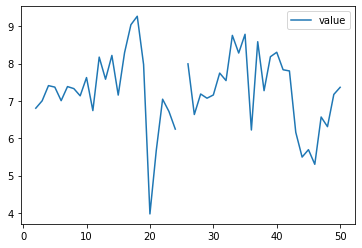

In [18]:
df2.plot()

In [19]:
df2['date'] = pd.to_datetime(df2['date'])
df2
df3 = df2.set_index("date")
df3.head()

,value
date,
2020-06-20 03:00:00,NaN
2020-06-20 02:00:00,NaN
2020-06-20 01:00:00,6.80369
2020-06-20 00:00:00,7.00097
2020-06-19 23:00:00,7.40810


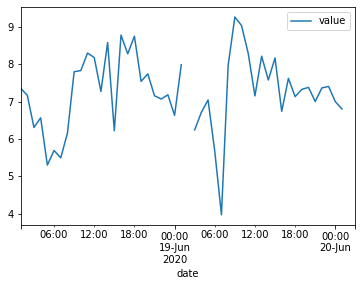

In [20]:
df3.plot()

In [21]:
import matplotlib.pyplot as plt
plt.close('all')
arr = df2.to_numpy()
arr

array([[Timestamp('2020-06-20 03:00:00'), nan],
       [Timestamp('2020-06-20 02:00:00'), nan],
       [Timestamp('2020-06-20 01:00:00'), 6.80369],
       [Timestamp('2020-06-20 00:00:00'), 7.00097],
       [Timestamp('2020-06-19 23:00:00'), 7.4081],
       [Timestamp('2020-06-19 22:00:00'), 7.3682],
       [Timestamp('2020-06-19 21:00:00'), 7.00541],
       [Timestamp('2020-06-19 20:00:00'), 7.38224],
       [Timestamp('2020-06-19 19:00:00'), 7.3283],
       [Timestamp('2020-06-19 18:00:00'), 7.13471],
       [Timestamp('2020-06-19 17:00:00'), 7.62386],
       [Timestamp('2020-06-19 16:00:00'), 6.73941],
       [Timestamp('2020-06-19 15:00:00'), 8.17137],
       [Timestamp('2020-06-19 14:00:00'), 7.57952],
       [Timestamp('2020-06-19 13:00:00'), 8.21644],
       [Timestamp('2020-06-19 12:00:00'), 7.15466],
       [Timestamp('2020-06-19 11:00:00'), 8.29107],
       [Timestamp('2020-06-19 10:00:00'), 9.03809],
       [Timestamp('2020-06-19 09:00:00'), 9.26567],
       [Timestamp('2020

In [22]:
arr2 = np.swapaxes(arr,0,1)
arr2

array([[Timestamp('2020-06-20 03:00:00'),
        Timestamp('2020-06-20 02:00:00'),
        Timestamp('2020-06-20 01:00:00'),
        Timestamp('2020-06-20 00:00:00'),
        Timestamp('2020-06-19 23:00:00'),
        Timestamp('2020-06-19 22:00:00'),
        Timestamp('2020-06-19 21:00:00'),
        Timestamp('2020-06-19 20:00:00'),
        Timestamp('2020-06-19 19:00:00'),
        Timestamp('2020-06-19 18:00:00'),
        Timestamp('2020-06-19 17:00:00'),
        Timestamp('2020-06-19 16:00:00'),
        Timestamp('2020-06-19 15:00:00'),
        Timestamp('2020-06-19 14:00:00'),
        Timestamp('2020-06-19 13:00:00'),
        Timestamp('2020-06-19 12:00:00'),
        Timestamp('2020-06-19 11:00:00'),
        Timestamp('2020-06-19 10:00:00'),
        Timestamp('2020-06-19 09:00:00'),
        Timestamp('2020-06-19 08:00:00'),
        Timestamp('2020-06-19 07:00:00'),
        Timestamp('2020-06-19 06:00:00'),
        Timestamp('2020-06-19 05:00:00'),
        Timestamp('2020-06-19 04:0